Python 🐍 - CO2 Emissions

📖 Background

We volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules.

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

💾 The data

We have access to seven years of CO2 emissions data for Canadian vehicles :

    "Make" - The company that manufactures the vehicle.
    "Model" - The vehicle's model.
    "Vehicle Class" - Vehicle class by utility, capacity, and weight.
    "Engine Size(L)" - The engine's displacement in liters.
    "Cylinders" - The number of cylinders.
    "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
    "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
    "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
    "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving.

The data comes from the Government of Canada's open data website (https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6).


In [1]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

# create numpy arrays
make = cars['Make'].to_numpy()
model = cars['Model'].to_numpy()
classes = cars['Vehicle Class'].to_numpy()
engine_size = cars['Engine Size(L)'].to_numpy()
cylinders = cars['Cylinders'].to_numpy()
transmission = cars['Transmission'].to_numpy()
fuel_type = cars['Fuel Type'].to_numpy()
fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [2]:
# 1. What is the median engine size in liters?

st.median(engine_size)


3.0

In [3]:
# 2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?

# List of available gasoline types
fuel_types = ["X", "Z", "E", "D"]

# For Loop to generate the average for each fuel type based on above list
for fuel_type in fuel_types:
    avg_consumption = round((cars[cars["Fuel Type"] == fuel_type])["Fuel Consumption Comb (L/100 km)"].mean(), 2)
    
    print("The Average fuel consumption for", fuel_type, "is", avg_consumption, "L/100 km")

The Average fuel consumption for X is 10.08 L/100 km
The Average fuel consumption for Z is 11.42 L/100 km
The Average fuel consumption for E is 16.86 L/100 km
The Average fuel consumption for D is 8.84 L/100 km


In [4]:
# 3. What is the correlation between fuel consumption and CO2 emissions?

x= cars["Fuel Consumption Comb (L/100 km)"]
y= cars["CO2 Emissions(g/km)"]

# Calculate values for Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#Correlation coefficient
corr = x.corr(y)
corr

0.9180515723870849

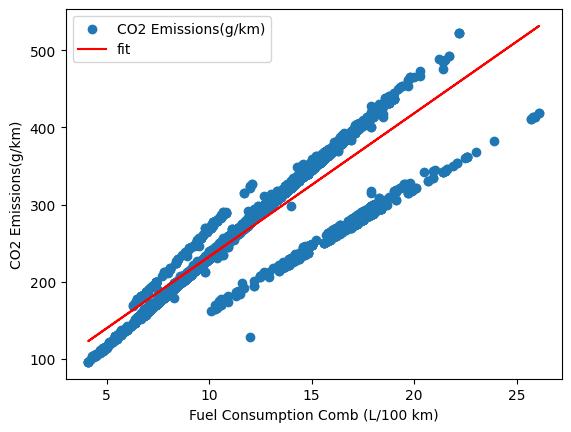

In [5]:
# With a correlation coefficient of ~0.92, there is a strong linear relationship between Fuel Consumption and C02 Emissions

# Scatter plot with fitted simple regression
fig, ax= plt.subplots()

ax.scatter(x="Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)", data=cars)
ax.plot(x, intercept + slope*x, 'r', label='fit')
ax.legend()
ax.set_xlabel("Fuel Consumption Comb (L/100 km)")
ax.set_ylabel("CO2 Emissions(g/km)")

plt.show()

In [6]:
# 4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?

emissions1 = round((cars[cars["Vehicle Class"] == 'SUV - SMALL'])["CO2 Emissions(g/km)"].mean(), 2)
emissions2 = round((cars[cars["Vehicle Class"] == 'MID-SIZE'])["CO2 Emissions(g/km)"].mean(), 2)


# IF/ELSE Loop to determine the vehicle class with the lowest average C02 emissions
if emissions1 < emissions2:
    print(classes[0], "has lower average emissions with", emissions1, "g/km")
elif emissions1 > emissions2:
    print(classes[1], "has lower average emissions with", emissions2, "g/km")
else:
    print("The two classes have the same average emissions")

COMPACT has lower average emissions with 222.46 g/km


In [7]:
# 5a. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?

all_em = round(co2_emissions.mean(), 2)

all_em

250.58

In [8]:
# 5b. For vehicles with an engine size of 2.0 liters or smaller?

l2_em = round(cars[cars["Engine Size(L)"] <= 2.0]["CO2 Emissions(g/km)"].mean(), 2)

l2_em

198.27

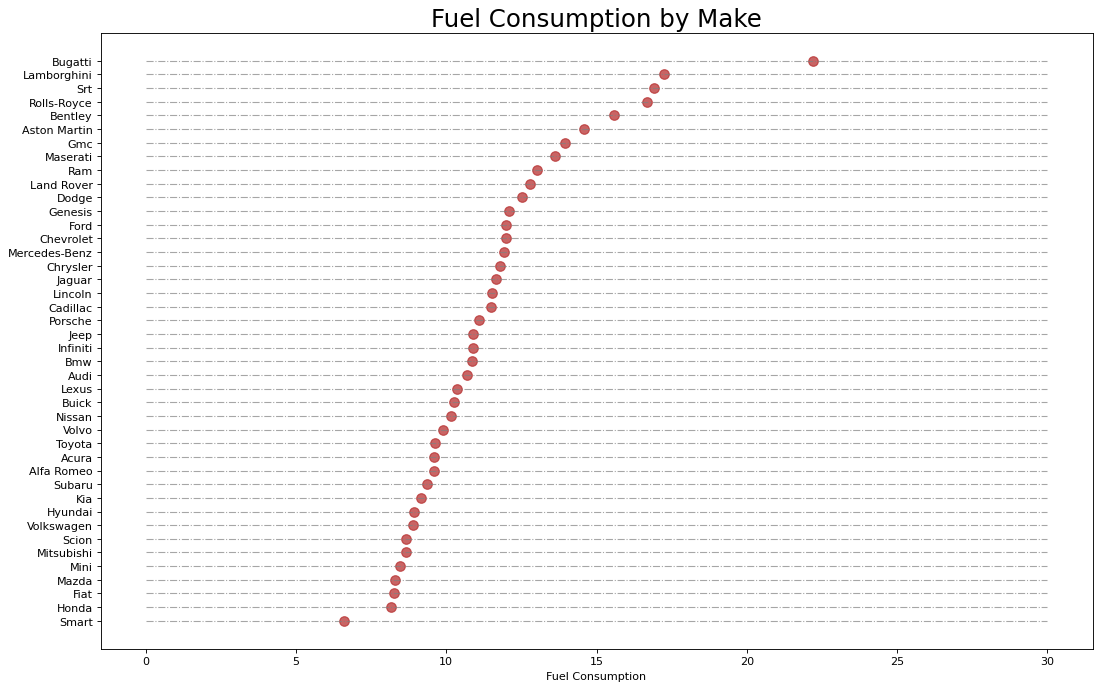

In [12]:
# 6. Any other insights you found during your analysis?

df = cars[['Make', 'Fuel Consumption Comb (L/100 km)']].groupby('Make').apply(lambda x: x.mean())
df.sort_values('Fuel Consumption Comb (L/100 km)', inplace=True)
df.reset_index(inplace=True)

# Curious to see the relationship between fuel consumption by make
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)

ax.hlines(y=df.index, xmin=0, xmax=30, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df['Fuel Consumption Comb (L/100 km)'].groupby(df.index).mean(), s=75, color='firebrick', alpha=0.7)

ax.set_title('Fuel Consumption by Make', fontdict={'size':22})
ax.set_xlabel('Fuel Consumption')
ax.set_yticks(df.index)
ax.set_yticklabels(df.Make.str.title(), fontdict={'horizontalalignment': 'right'})

plt.show()

Bugatti has the highest average fuel consumption by make by a significant margin to the second highest, Lamborghini. On the other hand, Smart has the lowest by make with Honda, Fiat and Mazda following shortly after.